# Install Libraries

In [2]:
!pip install tensorflow opencv-python matplotlib scikit-learn pillow Pylance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 MB 19.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 18.4 MB/s eta 0:00:00


# Import Modules

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from google.colab import files
from PIL import Image
import json


# Upload a Room Image

In [ ]:
uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    print("Uploaded:", img_path)


Saving room.jpg to room.jpg
Uploaded: room.jpg


# Show the Uploaded Image

(np.float64(-0.5), np.float64(571.5), np.float64(1279.5), np.float64(-0.5))

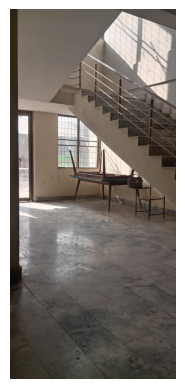

In [ ]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis("off")


# Extract Dominant Colors

In [ ]:
def extract_colors(image, k=5):
    img = cv2.resize(image, (200, 200))
    img = img.reshape((img.shape[0] * img.shape[1], 3))

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(img)

    colors = kmeans.cluster_centers_.astype(int)
    return colors

dominant_colors = extract_colors(img_rgb, k=5)
dominant_colors


array([[ 55,  48,  41],
       [123, 113, 105],
       [234, 226, 219],
       [ 90,  82,  75],
       [168, 162, 159]])

# Visualize Dominant Colors

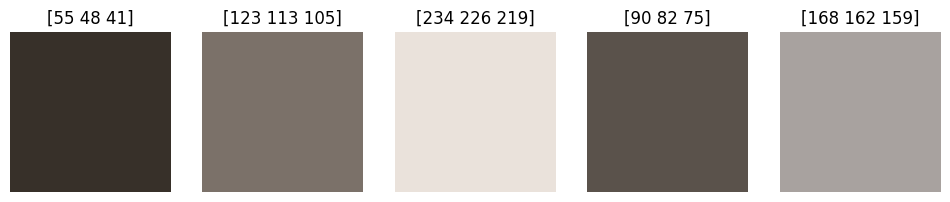

In [ ]:
plt.figure(figsize=(12, 3))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, 5, i+1)
    plt.imshow([[color]])
    plt.title(f"{color}")
    plt.axis("off")
plt.show()


# Room Style Classification (Using MobileNetV2)

In [ ]:
model = MobileNetV2(weights='imagenet')

def classify_style(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model.predict(img_array)
    decoded = decode_predictions(preds, top=3)[0]

    labels = [d[1] for d in decoded]
    print("Raw predictions:", labels)

    # SIMPLE MAPPING
    if any(x in labels for x in ["sofa", "dining_table", "studio_couch"]):
        return "Modern"
    if any(x in labels for x in ["bookcase"]):
        return "Minimalist"
    if any(x in labels for x in ["window_shade", "curtain"]):
        return "Contemporary"
    return "Unknown"

detected_style = classify_style(img_path)
detected_style


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Raw predictions: ['pier', 'prison', 'solar_dish']


'Unknown'

# Recommendation Engine (Rule-based JSON)

In [ ]:
recommendations = {
    "Modern": {
        "furniture": ["Sleek sofa", "Glass coffee table", "Floor lamp"],
        "colors": ["White", "Gray", "Black"],
        "decor": ["Abstract art", "Geometric rug"]
    },
    "Minimalist": {
        "furniture": ["Wooden low bed", "Simple storage", "Neutral sofa"],
        "colors": ["Beige", "Off-white", "Oak"],
        "decor": ["Small plants", "Plain curtains"]
    },
    "Contemporary": {
        "furniture": ["Fabric sofa", "Wood-metal table", "Modern shelves"],
        "colors": ["Cream", "Navy", "Charcoal"],
        "decor": ["Soft lighting", "Curtain panels"]
    }
}


# Generate Final Suggestions

In [ ]:
def suggest(style, colors):
    print("### Detected Style:", style)
    print("\n### Dominant Colors:", colors.tolist())

    if style in recommendations:
        rec = recommendations[style]
    else:
        rec = recommendations["Modern"]

    print("\n### Recommended Furniture:")
    for item in rec["furniture"]:
        print("- " + item)

    print("\n### Recommended Color Themes:")
    for color in rec["colors"]:
        print("- " + color)

    print("\n### Décor Suggestions:")
    for item in rec["decor"]:
        print("- " + item)

suggest(detected_style, dominant_colors)


### Detected Style: Unknown

### Dominant Colors: [[55, 48, 41], [123, 113, 105], [234, 226, 219], [90, 82, 75], [168, 162, 159]]

### Recommended Furniture:
- Sleek sofa
- Glass coffee table
- Floor lamp

### Recommended Color Themes:
- White
- Gray
- Black

### Décor Suggestions:
- Abstract art
- Geometric rug
